#Business Analytics: Data Visualization Assignment


---



##Overview
In this assignment, you will apply the Matplotlib visualization techniques we covered in class to analyze business data for a fictional e-commerce company called “TechTrends.” TechTrends is interested in understanding their sales performance, customer behavior, and market position, and they need your help to create insightful visualizations that will guide their business decisions.

##Learning Objectives
By completing this assignment, you will demonstrate your ability to:

- Create appropriate visualizations for different types of business data
- Customize plots with proper titles, labels, and styling
- Create multi-plot dashboards for comprehensive data analysis
- Integrate pandas with matplotlib for efficient data visualization
- Apply best practices for effective business visualizations
- Draw insights from visualizations and communicate them effectively

##Instructions
1. Download the dataset files from the course website:
- sales_data.csv: Monthly sales data for the past two years
- product_performance.csv: Revenue and profit margins by product category
- customer_data.csv: Customer demographics and purchase behavior
- competitor_analysis.csv: Market share comparison with competitors
2. Complete all the tasks described
3. Submit your completed Jupyter notebook (.ipynb) or Python script (.py) file
4. Include a brief written report (PDF, 1-2 pages) explaining your insights from the visualizations


---



###Import Relevant Libraries

In [ ]:
# Standard import convention
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For displaying plots directly in Jupyter notebooks
%matplotlib inline

##Task 1: Sales Trend Analysis

####Comparative Line Plot

This plot displays the monthly sales for 2023 and 2024

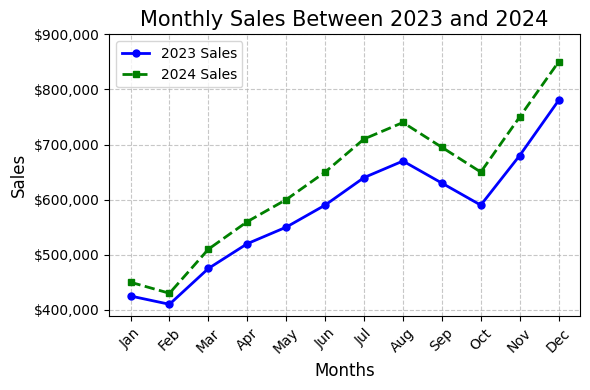

In [ ]:
#upload and read sales-data file
sales_data = pd.read_csv('sales-data.csv')

#filtering dataframe based on years 2023 and 2024
years2023 = sales_data[sales_data['Year'] == 2023]
years2024 = sales_data[sales_data['Year'] == 2024]

#retrieving sales axis' figures from each year
sales2023 = years2023['Sales']
sales2024 = years2024['Sales']

#retrieving month axis
months = years2023['Month']

#line plot
fig, ax = plt.subplots(figsize=(6,4)) #creates empty subplot

#create both lines for 2023 and 2024
ax.plot(months, sales2023, color='blue', linestyle='-', marker='o',
        linewidth=2, markersize=5, label='2023 Sales')

ax.plot(months, sales2024, color='green', linestyle='--', marker='s',
        linewidth=2, markersize=5, label='2024 Sales')

#Set title and axis labels
ax.set_title('Monthly Sales Between 2023 and 2024',fontsize=15)
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

#customize ticks and tick labels
ax.set_yticks(range(400000, 1000000, 100000))
ax.set_yticklabels([f'${sales:,.0f}' for sales in ax.get_yticks()])
ax.set_xticks(months)
ax.set_xticklabels(months, rotation=45)

#Add Legend and Grid
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

#display comparative line plot
plt.tight_layout()
plt.show()

###Comparative Bar Chart

This chart compares quartarly sales for 2023 and 2024

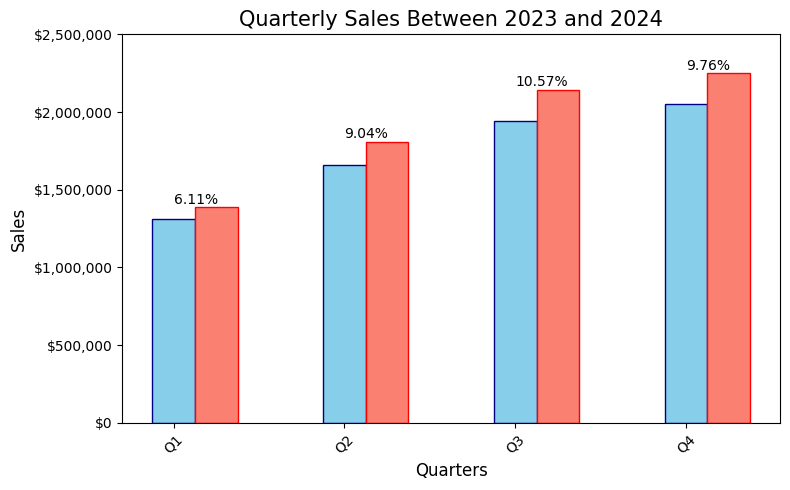

In [ ]:
#sorting the months by quarters using mapping
month_to_quarter = {
    'Jan': 'Q1', 'Feb': 'Q1', 'Mar': 'Q1',
    'Apr': 'Q2', 'May': 'Q2', 'Jun': 'Q2',
    'Jul': 'Q3', 'Aug': 'Q3', 'Sep': 'Q3',
    'Oct': 'Q4', 'Nov': 'Q4', 'Dec': 'Q4'
}

year2023 = sales_data[sales_data['Year'] == 2023]
year2024 = sales_data[sales_data['Year'] == 2024]

#create a Quarter column
sales_data['Quarter'] = sales_data['Month'].map(month_to_quarter)

#redeclare years2023 and years2024 to add Quarter column per year
years2023 = sales_data[sales_data['Year'] == 2023]
years2024 = sales_data[sales_data['Year'] == 2024]

#Create list of quarters
qs = ['Q1', 'Q2', 'Q3', 'Q4']

#group data per year organizing the sum of each quarters sales. reset_index() allows further indexing of the individual columns
quarter23 = years2023.groupby('Quarter').agg({'Sales': ['sum']}).reset_index()
quarter24 = years2024.groupby('Quarter').agg({'Sales': ['sum']}).reset_index()
quarterboth = pd.concat([quarter23, quarter24]) #puts both years into one dataframe

#create bar chart
fig, ax = plt.subplots(figsize=(8,5))

#create bar chart
bar_width = 0.25
bar23 = ax.bar(qs, quarter23[('Sales', 'sum')], bar_width, color='skyblue', edgecolor='navy')
bar24 = ax.bar([i + bar_width for i in range(len(qs))], quarter24[('Sales', 'sum')], bar_width, color='salmon', edgecolor='red')

#create bar labels
for i in range(len(qs)):
    percentage_diff = ((quarter24[('Sales', 'sum')][i] - quarter23[('Sales', 'sum')][i]) / quarter23[('Sales', 'sum')][i]) * 100
    ax.text(i, quarter24[('Sales', 'sum')][i] + 1500, f"{percentage_diff:.2f}%", ha="left", va="bottom", color="black")

#removes scientific notation
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

#set title and axis labeks
ax.set_title('Quarterly Sales Between 2023 and 2024', fontsize=15)
ax.set_ylabel('Sales', fontsize=12)
ax.set_xlabel('Quarters', fontsize=12)

#set ticks for each axis
ax.set_xticks(qs)
ax.set_xticklabels(qs, rotation=45)
ax.set_yticks(range(0, 3000000, 500000))
ax.set_yticklabels([f'${sales:,.0f}' for sales in ax.get_yticks()])

#display bar chart
plt.tight_layout()
plt.show()

###Cumulative Line Plot
Ths line plot shows the cumulative sales for both years

<ipython-input-4-8a224fb7a0a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years2023['Cumulative Sales'] = years2023['Sales'].cumsum()
<ipython-input-4-8a224fb7a0a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years2024['Cumulative Sales'] = years2024['Sales'].cumsum()


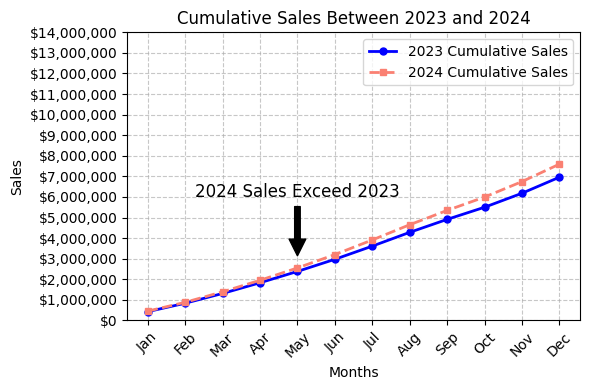

In [ ]:
#create a cumulative sales column
years2023['Cumulative Sales'] = years2023['Sales'].cumsum()
years2024['Cumulative Sales'] = years2024['Sales'].cumsum()

#create line plot
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(months, years2023['Cumulative Sales'], color='blue', linestyle='-', marker='o',
        linewidth=2, markersize=5, label='2023 Cumulative Sales')

ax.plot(months, years2024['Cumulative Sales'], color='salmon', linestyle='--', marker='s',
        linewidth=2, markersize=5, label='2024 Cumulative Sales')

#add Legend and Grid
ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.7)

#customize ticks and tick labels
ax.set_yticks(range(0, 15000000, 1000000))
ax.set_yticklabels([f'${sales:,.0f}' for sales in ax.get_yticks()])
ax.set_xticks(months)
ax.set_xticklabels(months, rotation=45)

#create annotation pointing to passing year
ax.annotate('2024 Sales Exceed 2023', xy=(4, 3000000), xytext=(4, 6000000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12, ha='center')

#set title and axis labels
ax.set_title('Cumulative Sales Between 2023 and 2024', fontsize=12)
ax.set_ylabel('Sales', fontsize=10)
ax.set_xlabel('Months', fontsize=10)

#display plot
plt.tight_layout()
plt.show()



---


##Task 2: Product Performance Analysis




###Horizontal Bar Chart
- Shows revenue by product category

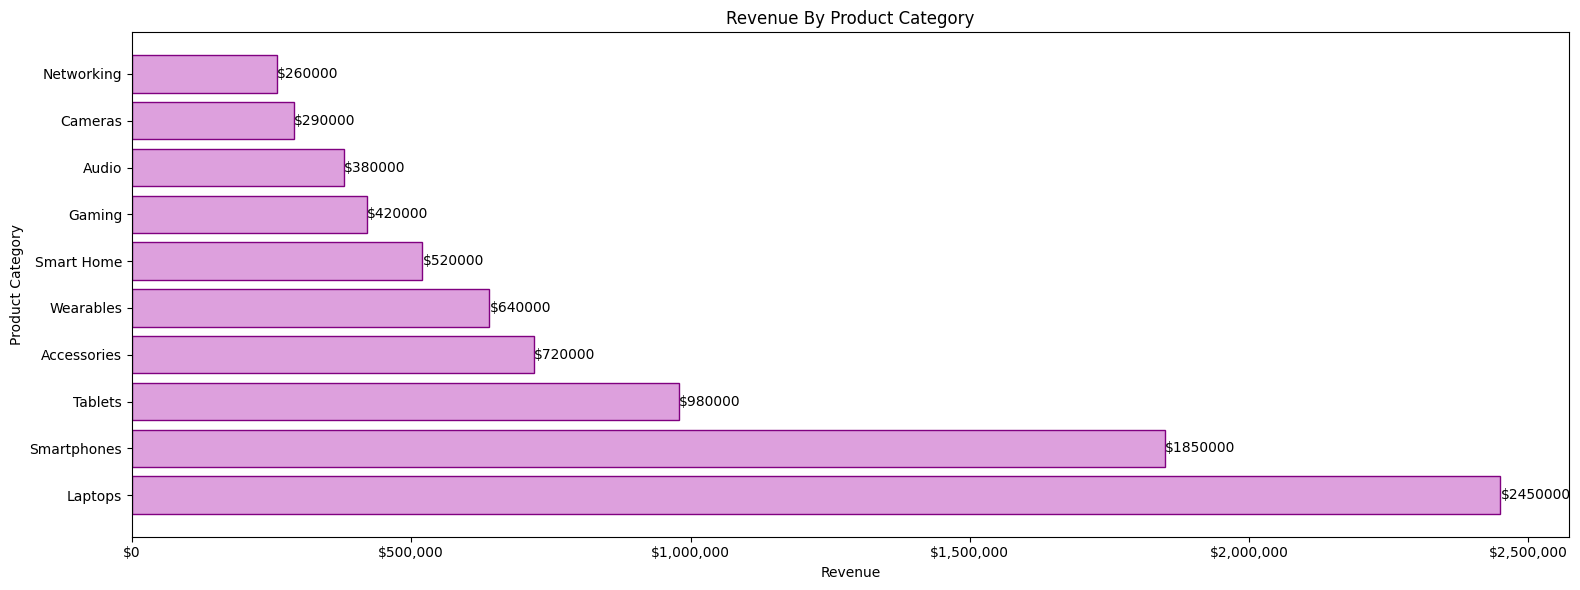

In [ ]:
#turn file into dataframe
product_performance = pd.read_csv('product-performance.csv')

#create bar chart
fig, ax = plt.subplots(figsize=(16,6))
bars = ax.barh(product_performance['Category'], product_performance['Revenue'], color='plum', edgecolor='purple')

# Add data labels inside each bar
for i, v in enumerate(product_performance['Revenue']):
    ax.text(v + 1, i, f'${v}', va='center')

#set title and axis labels
ax.set_title('Revenue By Product Category', fontsize=12)
ax.set_ylabel('Product Category', fontsize=10)
ax.set_xlabel('Revenue', fontsize=10)

#customize ticks and tick labels
ax.set_xticks(range(0,3000000,500000))
ax.set_xticklabels([f'${sales:,.0f}' for sales in ax.get_xticks()])

#display chart
plt.tight_layout()
plt.show()

###Scatter Plot
- Shows the relationship between marketing spend and sales for each product

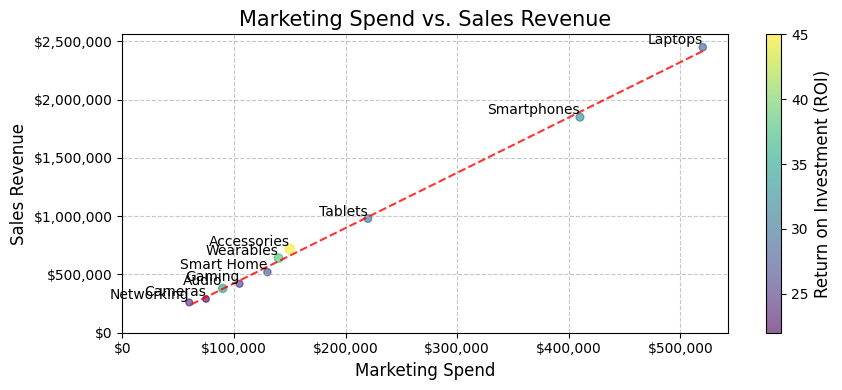

In [ ]:
#create scatter plot
fig, ax = plt.subplots(figsize=(9, 4))

# Create scatter plot with varying sizes based on campaign size
scatter = ax.scatter(product_performance['Marketing_Spend'], product_performance['Revenue'], s=product_performance['Profit_Margin'],
                    alpha=0.6, c=product_performance['Profit_Margin'], cmap='viridis')

# Add a colorbar to indicate campaign size
cbar = plt.colorbar(scatter)
cbar.set_label('Return on Investment (ROI)', fontsize=12)

# Add trend line
z = np.polyfit(product_performance['Marketing_Spend'], product_performance['Revenue'], 1)
p = np.poly1d(z)
ax.plot(product_performance['Marketing_Spend'], p(product_performance['Marketing_Spend']), "r--", alpha=0.8)

#create title and axis labels
ax.set_title('Marketing Spend vs. Sales Revenue', fontsize=15)
ax.set_xlabel('Marketing Spend', fontsize=12)
ax.set_ylabel('Sales Revenue', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

#set legend (Note, an actual legend can't be used here since color represents ROI instead of a specific dot)
for i, category in enumerate(product_performance['Category']):
    ax.text(product_performance['Marketing_Spend'][i], product_performance['Revenue'][i],
            category, fontsize=10, ha='right', va='bottom', color='black')

#set ticks
ax.set_yticks(range(0,3000000,500000))
ax.set_yticklabels([f'${sales:,.0f}' for sales in ax.get_yticks()])
ax.set_xticks(range(0,600000,100000))
ax.set_xticklabels([f'${sales:,.0f}' for sales in ax.get_xticks()])

#display scatter plot
plt.tight_layout()
plt.show()

###Pie Chart
- Shows the revenue distribution by product category

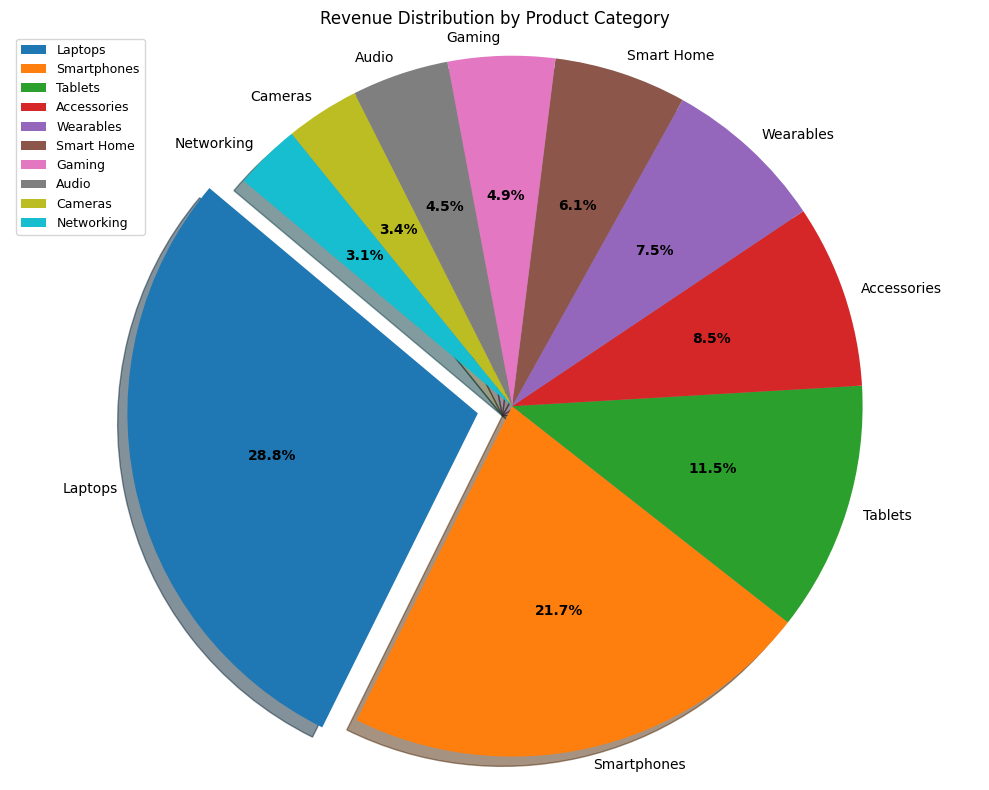

In [ ]:
#set explode for largest value
max_product = np.argmax(product_performance['Revenue'])
explode = np.zeros(len(product_performance['Revenue']))
explode[max_product] = 0.1

#create pie chart
fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(product_performance['Revenue'], labels=product_performance['Category'], autopct='%1.1f%%',
                                explode=explode, startangle=140, shadow=True, labeldistance=1.05)

# Enhance the text appearance
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_fontweight('bold')

#create title and legend
ax.set_title('Revenue Distribution by Product Category', fontsize=12)
ax.legend(wedges, product_performance['Category'], fontsize=9, loc='upper left')

#ensure full circle is drawn
ax.axis('equal')

#display pie chart
plt.tight_layout()
plt.show()



---

##Task 3: Customer Segmentation Analysis

###Histogram
- Shows the distribution of customer purchase amounts

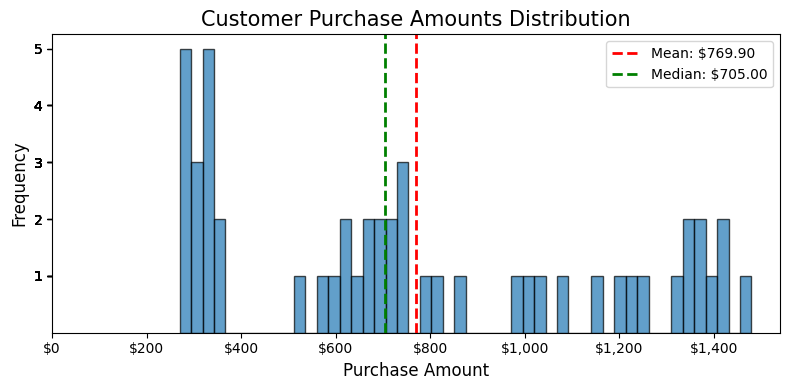

In [ ]:
#read csv file
customer_data = pd.read_csv('customer-data.csv')

#customer purchase amounts to a variable
purchase_amounts = customer_data['Purchase_Amount']

#create histogram
fig, ax = plt.subplots(figsize=(8, 4))
n, bins, patches = ax.hist(purchase_amounts, bins=50,
                           edgecolor='black', alpha=0.7)

# Add mean and median lines
ax.axvline(purchase_amounts.mean(), color='red', linestyle='dashed',
           linewidth=2, label=f'Mean: ${purchase_amounts.mean():.2f}')
ax.axvline(np.median(purchase_amounts), color='green', linestyle='dashed',
           linewidth=2, label=f'Median: ${np.median(purchase_amounts):.2f}')

#create title and axis labels
ax.set_title('Customer Purchase Amounts Distribution', fontsize=15)
ax.set_xlabel('Purchase Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()

#create ticks
ax.set_xticks(range(0,1600,200))
ax.set_xticklabels([f'${sales:,.0f}' for sales in ax.get_xticks()])
ax.set_yticks(customer_data['Purchase_Frequency'])


#display histogram
plt.tight_layout()
plt.show()

###Bar Chart
- Compares average purchase amounts by customer age group

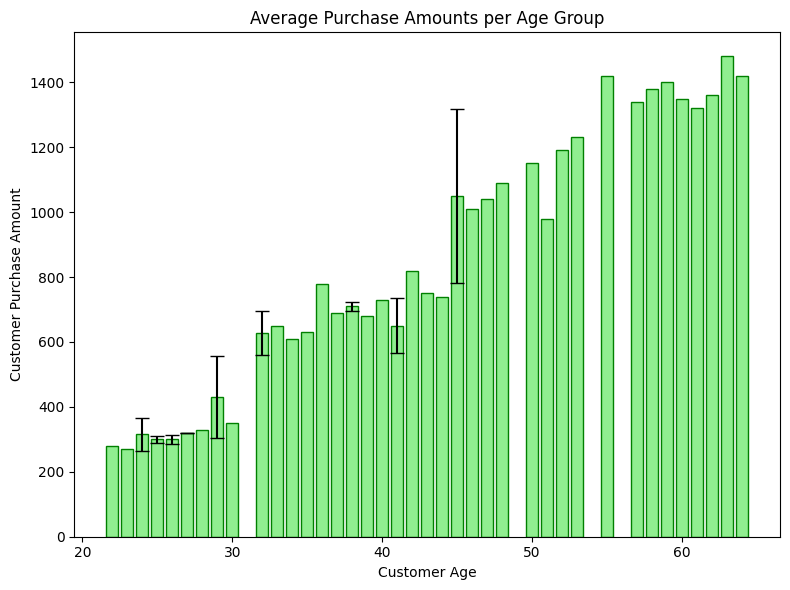

In [ ]:
#calculate average purchase amount by age
average_pa = customer_data.groupby('Age').agg({'Purchase_Amount': ['mean']}).reset_index()

#calculate standard deviation
std_dev = customer_data.groupby('Age').agg({'Purchase_Amount': ['std']}).reset_index()

#create bar chart
fig, ax = plt.subplots(figsize=(8,6))
barry = ax.bar(average_pa['Age'], average_pa[('Purchase_Amount', 'mean')], yerr=std_dev[('Purchase_Amount', 'std')], capsize=5, color='lightgreen', edgecolor='green')

#create title and axis labels
ax.set_title('Average Purchase Amounts per Age Group', fontsize=12)
ax.set_xlabel('Customer Age', fontsize=10)
ax.set_ylabel('Customer Purchase Amount', fontsize=10)


#display chart
plt.tight_layout()
plt.show()

###Grouped Bar Chart
- Shows purchase frequency by customer segment and product category

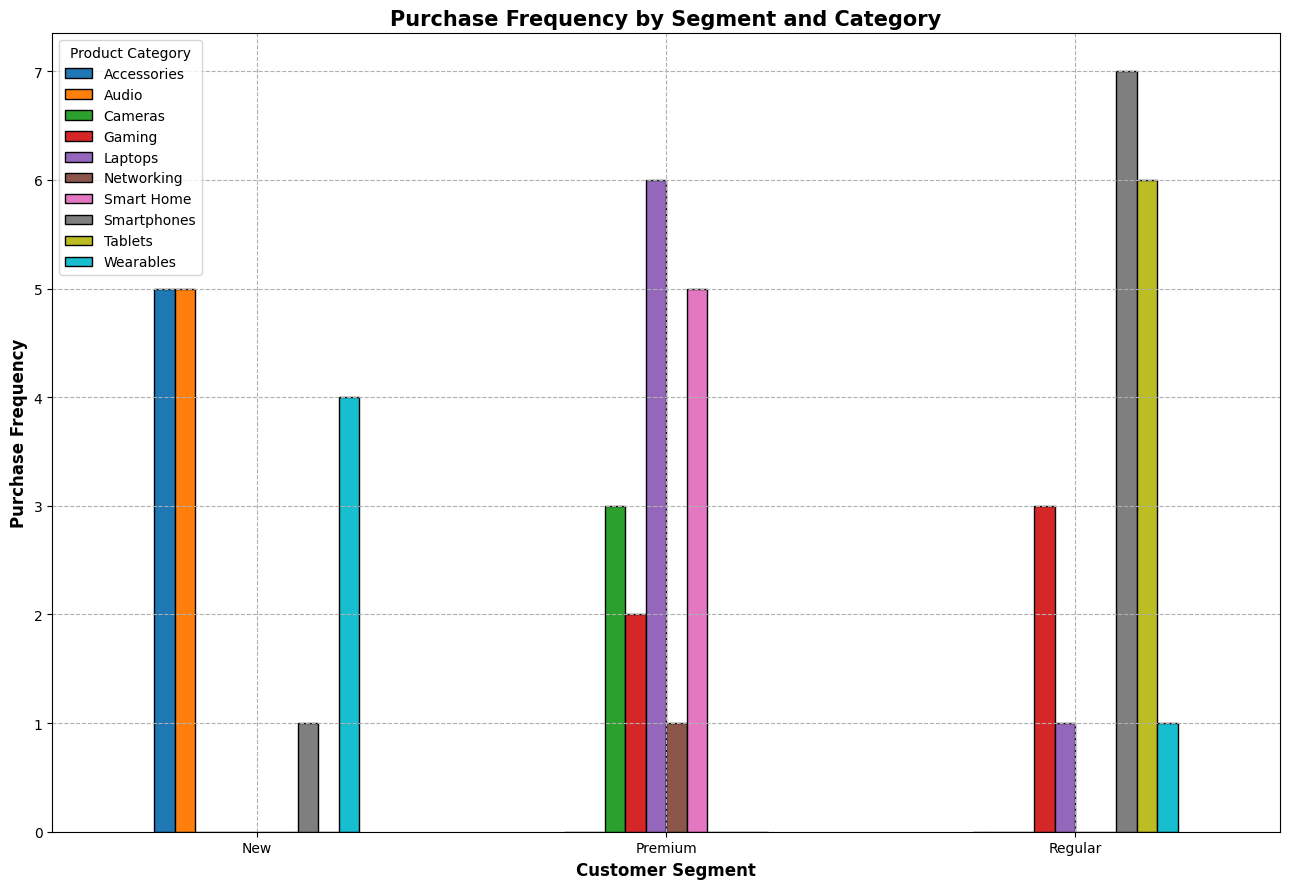

In [ ]:
#group the data and pivot for easier combinations
group = customer_data.groupby(['Segment', 'Product_Category']).size().reset_index(name='count')
pivot = group.pivot(index='Segment', columns='Product_Category', values='count').fillna(0)

'''
Most of this report uses the object oriented approach, however this chart
does not use the same fig, ax convention. I opted for direct plt code for simplicity.
'''

#create grouped bar chart
pivot.plot(kind='bar', figsize=(13, 9), edgecolor='black')

#set title and axis labels
plt.title('Purchase Frequency by Segment and Category', fontsize=15,fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12,fontweight='bold')
plt.ylabel('Purchase Frequency', fontsize=12,fontweight='bold')
plt.legend(title='Product Category', loc='upper left', fontsize=10)

#set ticks
plt.xticks(rotation=360)

#display chart
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()



---


##Task 4: Market Position Dashboard

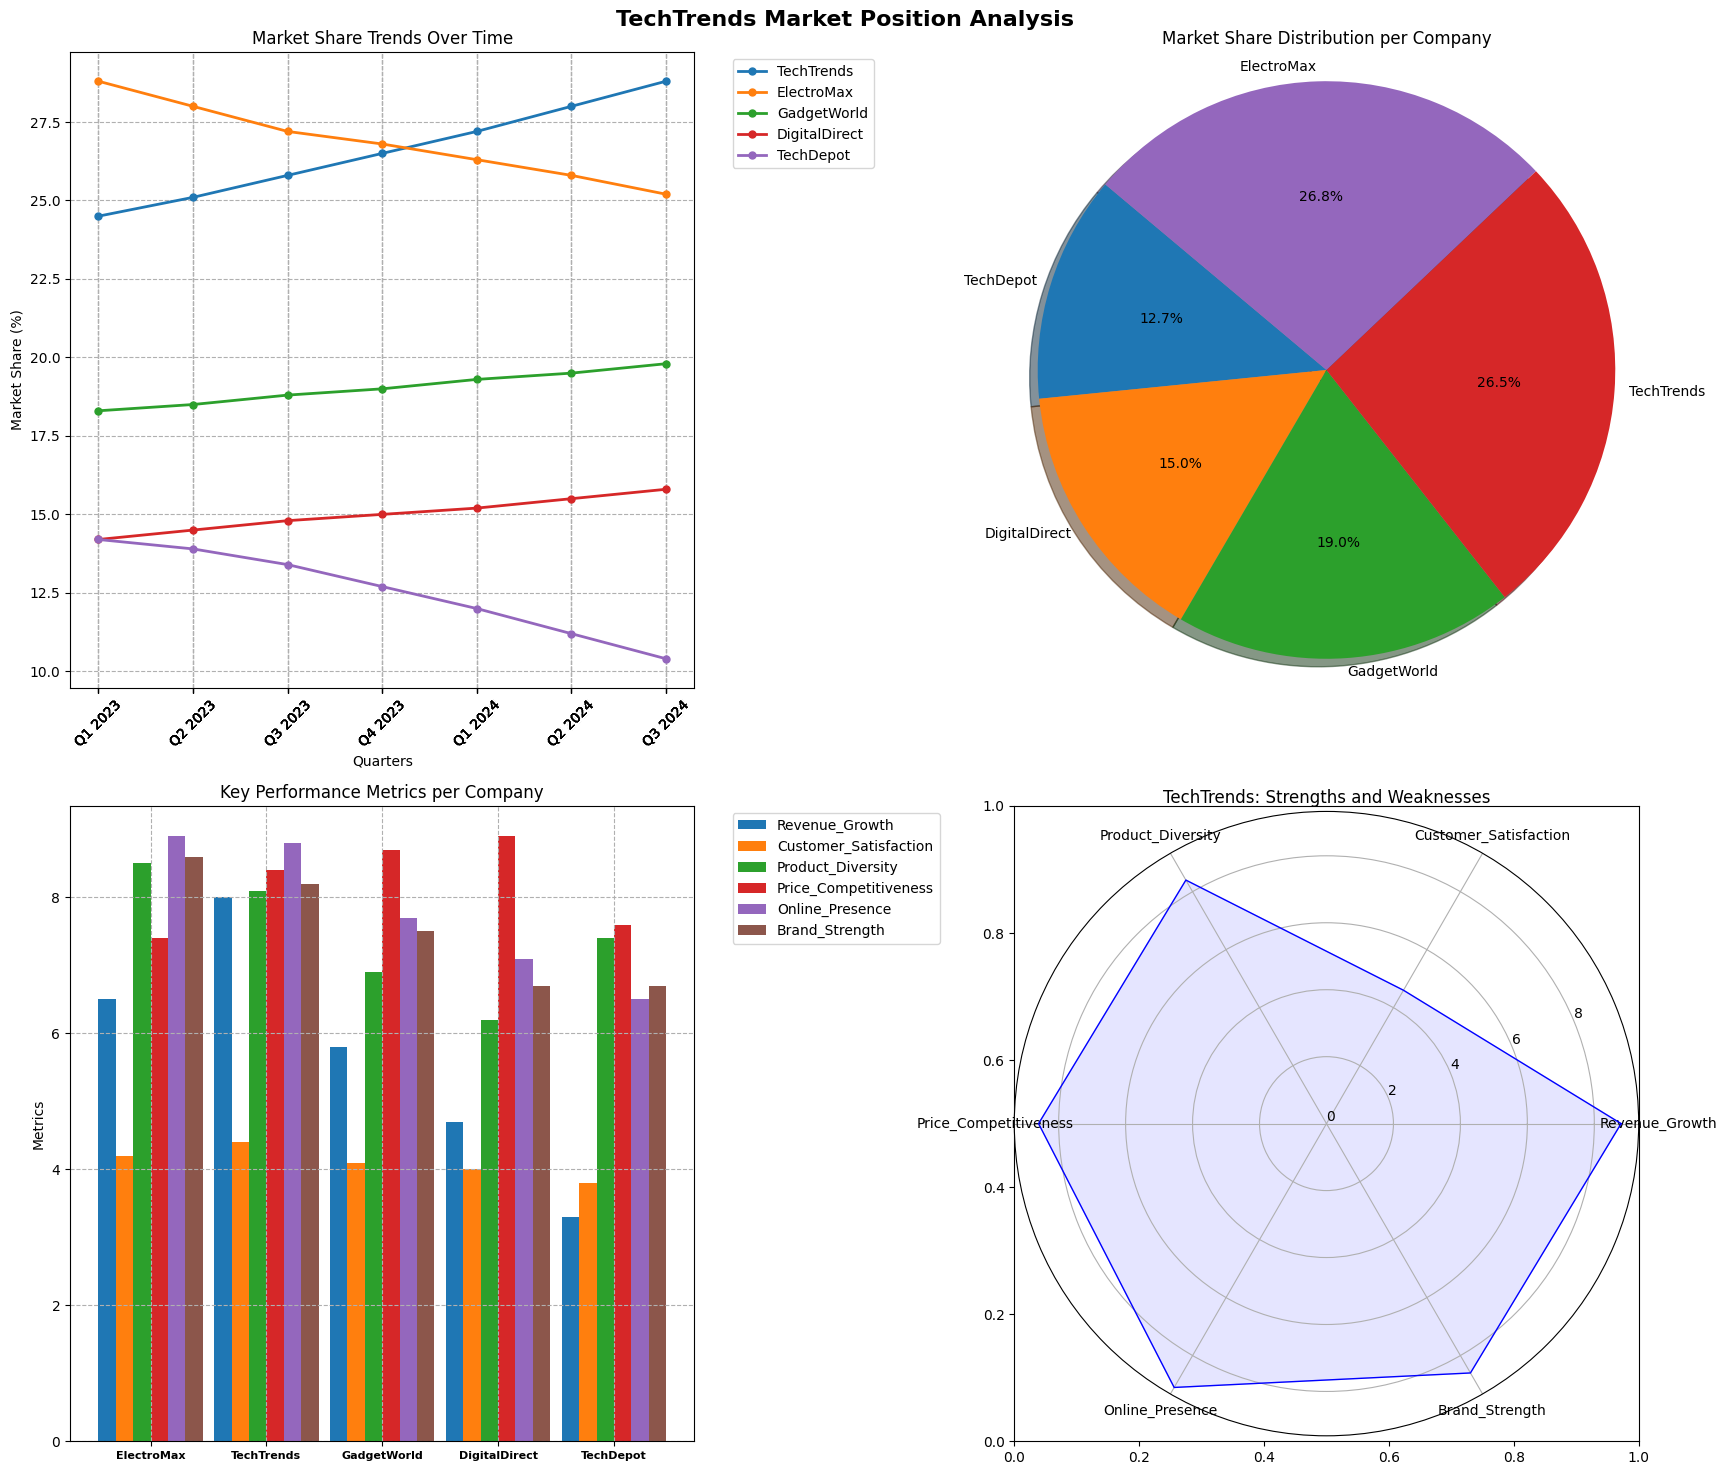

In [ ]:
#read csv file and initialize variables
ca = pd.read_csv('competitor-analysis.csv')
company = ca['Company'].unique()

#create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(17, 15))
fig.suptitle('TechTrends Market Position Analysis', fontsize=16, fontweight='bold') # 4.3

#fLatten axes array for easier indexing
axes = axes.flatten()

'''
Plot 1: Market trends over time (top-left)
'''
#for loop to plot a line for each unique company
for comp in company:
  companies = ca[ca['Company'] == comp]
  axes[0].plot(companies['Quarter'], companies['Market_Share'], label=comp, marker='o', markersize=5, linewidth=2)

#set title, axis labels, and tick labels
axes[0].set_title('Market Share Trends Over Time')
axes[0].set_xticks(ca['Quarter'])
axes[0].set_xticklabels(ca['Quarter'], rotation=45)
axes[0].set_xlabel('Quarters')
axes[0].set_ylabel('Market Share (%)')

#adds grid and legend for line plot, offsetting location to avoid overlapping
axes[0].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axes[0].grid(linestyle='--')

'''
Plot 2: Market Share Distribution (top-right)
'''
#creates a maximum of each quarters market shares for better percentage splits
current_market_share = ca[ca['Quarter'] == ca['Quarter'].max()].sort_values(by='Market_Share')

#create pie chart
axes[1].pie(current_market_share['Market_Share'], labels=current_market_share['Company'], autopct='%1.1f%%',
            startangle=140, shadow=True, labeldistance=1.05)
axes[1].axis('equal')

#set title of pie chart
axes[1].set_title('Market Share Distribution per Company')

'''
Plot 3: Key Performance Metrics (bottom-left)
'''
#create a maximum for each quarter for a better view on metrics
quarter_data = ca[ca['Quarter'] == ca['Quarter'].max()]

#take the key metric headings and turn them into a list for axis labels
key_metrics = ['Revenue_Growth', 'Customer_Satisfaction', 'Product_Diversity', 'Price_Competitiveness', 'Online_Presence', 'Brand_Strength']

#create bar chart
num_comps = range(len(company))
bar_width = 0.15
for i, metric in enumerate(key_metrics):
    axes[2].bar([pos + i * bar_width for pos in num_comps], quarter_data.sort_values(by='Market_Share', ascending=False)[metric], bar_width, label=metric)

#add this line to reduce the x-axis font size
axes[2].tick_params(axis='x', labelsize=8)

#set tile, axis labels, and ticks
axes[2].legend(loc='upper left', bbox_to_anchor=(1.05, 1))
axes[2].set_xticks([pos + 2.5 * bar_width for pos in num_comps])
axes[2].set_xticklabels(quarter_data.sort_values(by='Market_Share', ascending=False)['Company'], fontweight='bold')
axes[2].set_title('Key Performance Metrics per Company')
axes[2].set_ylabel('Metrics')
axes[2].grid(linestyle='--')

'''
#Plot 4: Strengths and Weaknesses (bottom-right)
'''
#narrows down company to just TechTrends
tt_radar = 'TechTrends'

if tt_radar not in ca['Company'].values:
    print(f"Warning: Company '{tt_radar}' not found in dataset.")
else:
    tt_data = ca[ca['Company'] == tt_radar].iloc[-1]

    #we can use the key_metrics as categories
    values = tt_data[key_metrics].values.flatten().tolist()
    values += values[:1]  # Close the radar loop

    #create angles for the radar chart
    ang = [n / float(len(key_metrics)) * 2 * np.pi for n in range(len(key_metrics))]
    ang += ang[:1]

    #create radar chart
    axes[3] = plt.subplot(2, 2, 4, polar=True)
    axes[3].plot(ang, values, linewidth=1, linestyle='solid', color='b')
    axes[3].fill(ang, values, color='b', alpha=0.1)

    #set title and ticks
    axes[3].set_title('TechTrends: Strengths and Weaknesses')
    axes[3].set_xticks(ang[:-1])
    axes[3].set_xticklabels(key_metrics)
    axes[3].set_yticks(np.arange(0, 10, 2))
    axes[3].set_yticklabels(np.arange(0, 10, 2))

#display plots
plt.tight_layout()
plt.show()